<a href="https://colab.research.google.com/github/manju-yadav211/traffic_signs_classification/blob/master/traffic_signs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D , MaxPooling2D
from keras.layers import Dense, Dropout,Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle
import pandas as pd
import numpy as np
import random

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#cloning repo containing the traffics sign dataset
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [ ]:
#list dataset content
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [ ]:
data=pd.read_csv('german-traffic-signs/signnames.csv')

In [ ]:
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [ ]:
#loading pickled dataset
with open('german-traffic-signs/train.p',mode='rb') as training:
  train=pickle.load(training)
with open('german-traffic-signs/valid.p',mode='rb') as validation:
  valid=pickle.load(validation)
with open('german-traffic-signs/test.p', mode='rb') as test:
  test=pickle.load(test)

In [ ]:
x_train,y_train=train['features'],train['labels']
x_validation,y_validation=valid['features'],valid['labels']
x_test,y_test=test['features'],test['labels']

In [ ]:
print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


image label={} 9


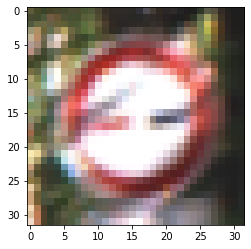

In [ ]:
index= np.random.randint(1,len(x_train))
plt.imshow(x_train[index])
print('image label={}',format(y_train[index]))

In [ ]:
#image preprocessing
#histogram equalization
#normalization


In [ ]:
#shuffle the data
from sklearn.utils import shuffle
x_train,y_train= shuffle(x_train,y_train)

In [ ]:
def preprocessing(img):
  #convert to grayscale
  img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  #apllying histogram equalization
  img=cv2.equalizeHist(img)
  #normalization
  img=img/255
  return img

In [ ]:
x_train_processed=np.array(list(map(preprocessing,x_train)))
x_validation_processed=np.array(list(map(preprocessing,x_validation)))
x_test_processed=np.array(list(map(preprocessing,x_test)))

In [ ]:
x_train_processed=x_train_processed.reshape(34799,32,32,1)
x_test_processed=x_test_processed.reshape(12630,32,32,1)
x_validation_processed=x_validation_processed.reshape(4410,32,32,1)


In [ ]:
print(x_train_processed.shape)
print(x_test_processed.shape)
print(x_validation_processed.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


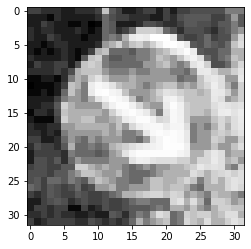

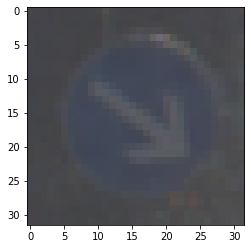

In [ ]:
i=random.randint(1,len(x_train))
plt.imshow(x_train_processed[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(x_train[i].squeeze())

Build Deep Convolutional Neural Network Model

In [ ]:
model=Sequential()
#add the convolutional layer
#filters, size of filters,input_shape,activation function
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,1)))
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#place a dropout layer
model.add(Dropout(0.25))

model.add(Conv2D(64,(5,5),activation='relu'))
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#flatten the image to 1 dimensional array
model.add(Flatten())
#add a dense layer: Amount of nodes, activation
model.add(Dense(256,activation='relu'))
#place a dropout layer
model.add(Dropout(0.5))
#0.5 drop out rate is recommend, half input nodes will be dropped at each update
model.add(Dense(43,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

In [ ]:
model.compile(Adam(lr=0.0001),loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_processed,
                  y_train,
                  batch_size=500,
                  epochs=20,
                  verbose=1,
                  validation_data=(x_validation_processed,
                  y_validation))


Train on 34799 samples, validate on 4410 samples
Epoch 1/20
34799/34799 [==============================] - 51s 1ms/step - loss: 0.4823 - accuracy: 0.8560 - val_loss: 0.4142 - val_accuracy: 0.8857
Epoch 2/20
34799/34799 [==============================] - 51s 1ms/step - loss: 0.4625 - accuracy: 0.8615 - val_loss: 0.3934 - val_accuracy: 0.8902
Epoch 3/20
34799/34799 [==============================] - 51s 1ms/step - loss: 0.4392 - accuracy: 0.8671 - val_loss: 0.3814 - val_accuracy: 0.8925
Epoch 4/20
34799/34799 [==============================] - 51s 1ms/step - loss: 0.4185 - accuracy: 0.8739 - val_loss: 0.3721 - val_accuracy: 0.8952
Epoch 5/20
34799/34799 [==============================] - 51s 1ms/step - loss: 0.4033 - accuracy: 0.8808 - val_loss: 0.3670 - val_accuracy: 0.8896
Epoch 6/20
34799/34799 [==============================] - 51s 1ms/step - loss: 0.3855 - accuracy: 0.8847 - val_loss: 0.3512 - val_accuracy: 0.8943
Epoch 7/20
34799/34799 [==============================] - 51s 1ms/ste

In [ ]:
score=model.evaluate(x_test_processed,y_test)

12630/12630 [==============================] - 5s 379us/step


In [ ]:
print('Test accuracy',score[1])

Test accuracy 0.9073634147644043


In [ ]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

Text(0.5, 0, 'epochs')

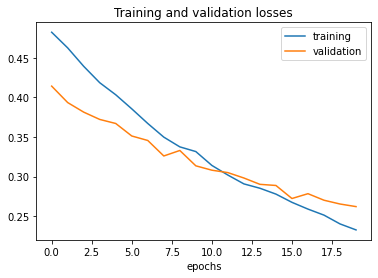

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation losses')
plt.xlabel('epochs')

In [ ]:
prediction = model.predict_classes(x_test_processed)
y_true_label = y_test

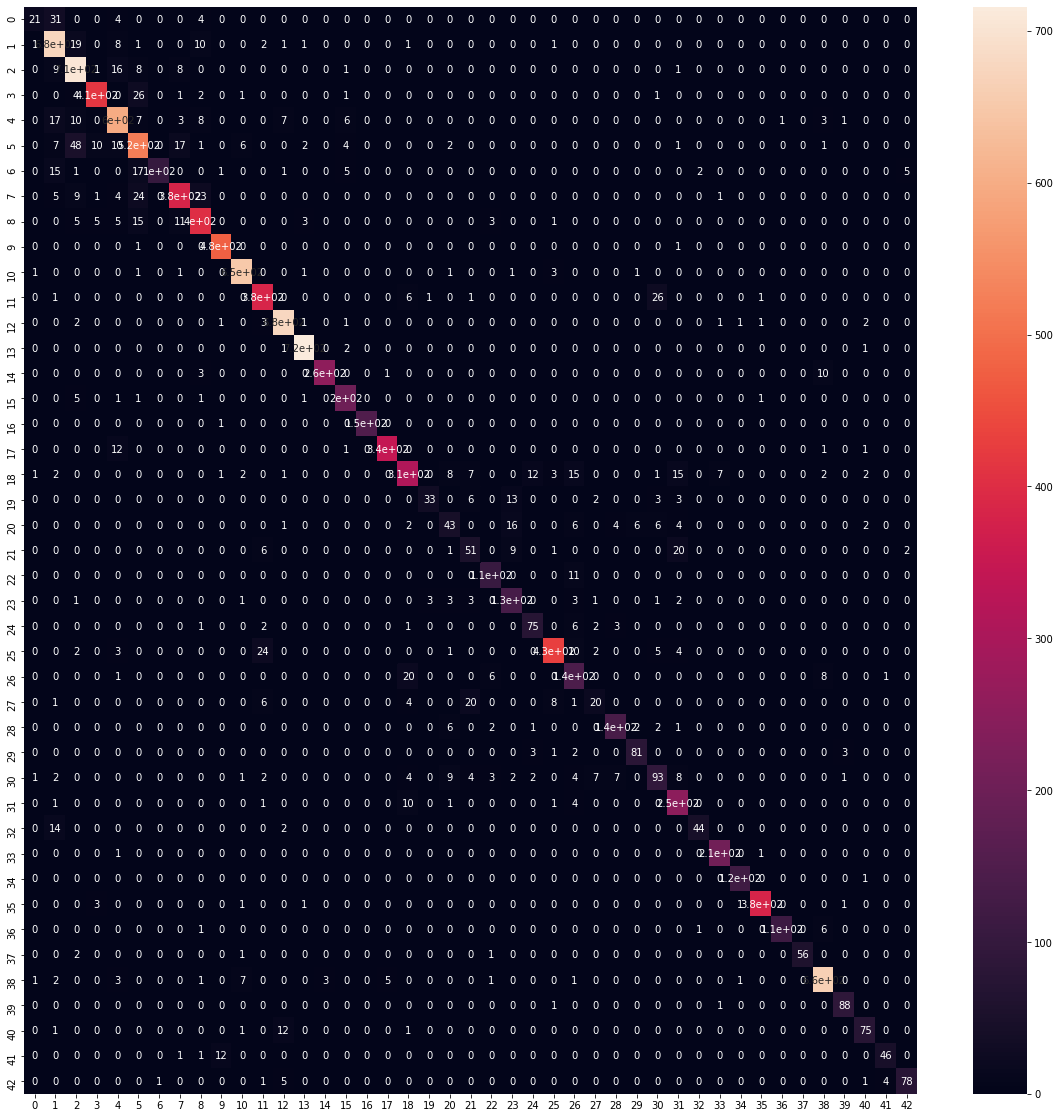

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true_label,prediction)
plt.figure(figsize=(20,20))
sns.heatmap(matrix,annot=True)

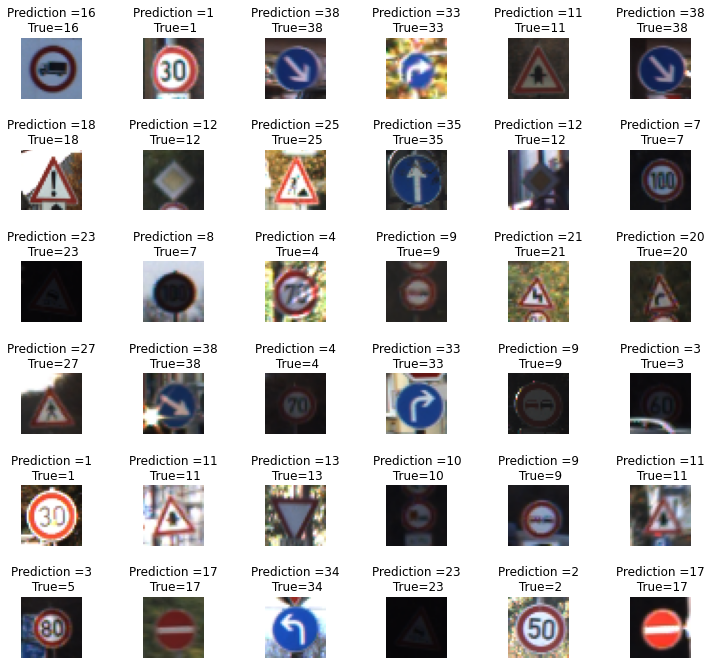

In [ ]:
L=6
W=6
fig, axes=plt.subplots(L,W,figsize=(12,12))
axes =axes.ravel()
for i in range(0,L*W):
  axes[i].imshow(x_test[i])
  axes[i].set_title('Prediction ={}\n True={}'.format(prediction[i],y_true_label[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)

In [ ]:
model.save('my_model.h5')